In [34]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [35]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Load Data and Preprocess
def load_data(filepath):
    data = pd.read_csv(filepath)
    
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()
    
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(data)
    
    return data, x_scaled

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pca = PCA(n_components=n_components)
    x_pca = pca.fit_transform(x)
    
    plt.figure(figsize=(7,4))
    plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.title('Explained Variance by Component')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(7,5))
    plt.scatter(x_pca[:,0], x_pca[:,1], s=30, alpha=0.7)
    plt.title('Data Distribution in PCA Space')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()
    
    return x_pca, pca

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    inertias = []
    silhouettes = []
    cluster_range = range(2, max_clusters+1)
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(x, kmeans.labels_))
    
    plt.figure(figsize=(7,4))
    plt.plot(cluster_range, inertias, marker='o')
    plt.title('Inertia Plot (Elbow Method)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(7,4))
    plt.plot(cluster_range, silhouettes, marker='o', color='orange')
    plt.title('Silhouette Score Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(x)
    
    plt.figure(figsize=(7,5))
    plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis', s=30, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
    plt.title('K-Means Clustering Results with Centroids')
    plt.xlabel('Feature 1 / PCA 1')
    plt.ylabel('Feature 2 / PCA 2')
    plt.show()
    
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(6,4))
    sns.barplot(x=unique, y=counts, palette='viridis')
    plt.title('K-Means Cluster Sizes')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Samples')
    plt.show()
    
    sil_values = silhouette_score(x, labels)
    print(f"Average Silhouette Score: {sil_values:.3f}")
    
    return labels, kmeans

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(x)
    return labels, agg

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    linked = linkage(x, method='ward')
    return linked

# Plot Dendrogram
def plot_dendrogram(linked):
    plt.figure(figsize=(10,6))
    dendrogram(linked)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

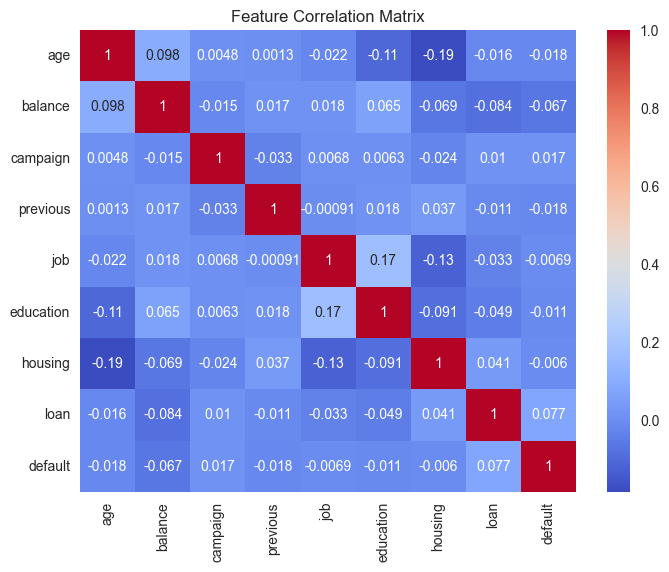

Data shape: (45211, 9)


In [36]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    plt.figure(figsize=(8,6))
    sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

In [37]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros_like(self.centroids)
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                new_centroids[k] = self.centroids[k]
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)
        
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break
                
            self.centroids = new_centroids
        
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

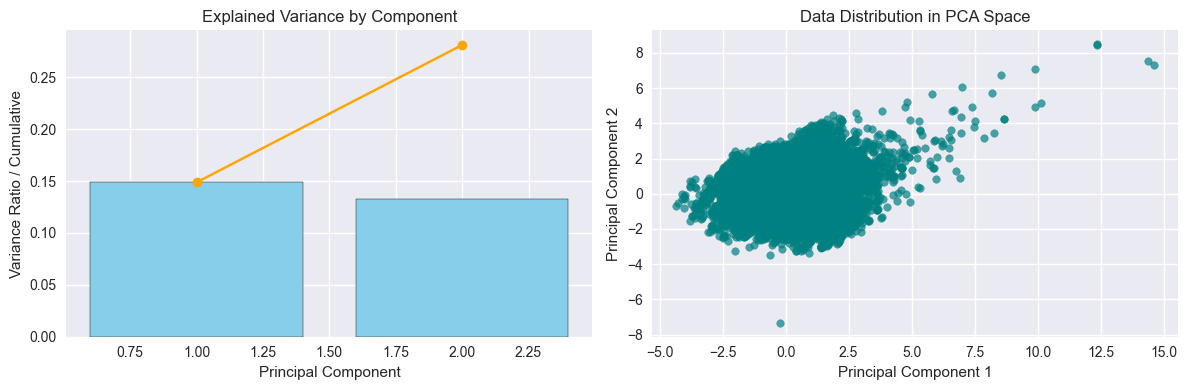

Shape after PCA: (45211, 2)


In [39]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)
    
    # TODO: Create visualization
    plt.figure(figsize=(12, 4))
    
    # Plot explained variance
    # Your code here
    plt.subplot(1, 2, 1)
    components = np.arange(1, n_components + 1)
    plt.bar(components, pca.explained_variance_ratio_, color='skyblue', edgecolor='black')
    plt.plot(components, np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio / Cumulative')
    plt.title('Explained Variance by Component')
    plt.grid(True)
    
    # Plot data in 2D
    # Your code here
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, s=30, c='teal')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data Distribution in PCA Space')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)



## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

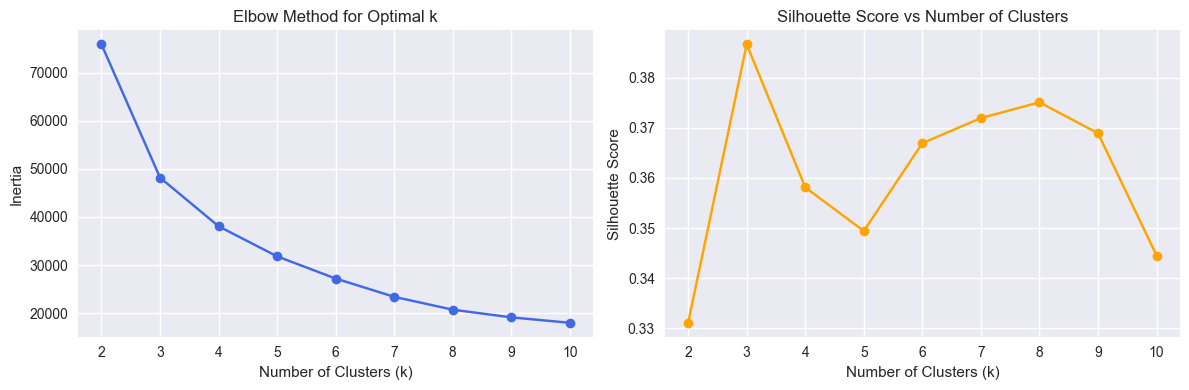

C:\Users\Chara\AppData\Local\Temp\ipykernel_25072\1708968376.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette='viridis')
C:\Users\Chara\AppData\Local\Temp\ipykernel_25072\1708968376.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=kmeans.labels, y=sil_values, palette='viridis')


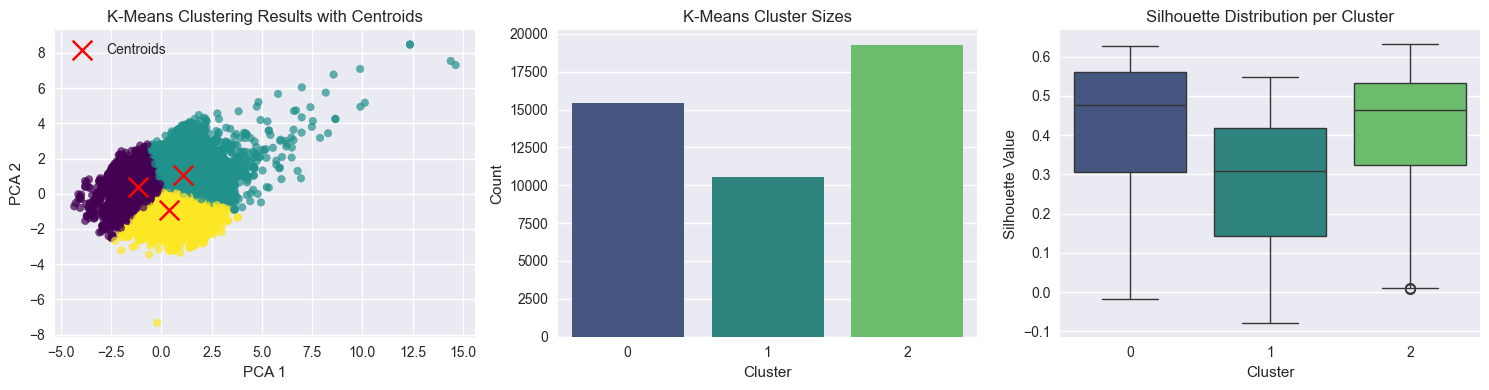


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [40]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
        inertia += np.sum(distances ** 2)
    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""

    # Your code here
    inertias = []
    silhouettes = []
    K = range(2, max_k + 1)
    
    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        sil = silhouette_score(X, kmeans.labels)
        inertias.append(inertia)
        silhouettes.append(sil)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, marker='o', color='royalblue')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouettes, marker='o', color='orange')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return inertias


# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=30, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering Results with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

plt.subplot(1, 3, 2)
unique, counts = np.unique(kmeans.labels, return_counts=True)
sns.barplot(x=unique, y=counts, palette='viridis')
plt.title('K-Means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
from sklearn.metrics import silhouette_samples
sil_values = silhouette_samples(X_pca, kmeans.labels)
sns.boxplot(x=kmeans.labels, y=sil_values, palette='viridis')
plt.title('Silhouette Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Value')

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        n_samples = X.shape[0]
        labels = np.zeros(n_samples, dtype=int)
        current_clusters = {0: np.arange(n_samples)}  # cluster_id -> indices
        next_label = 1

        while len(current_clusters) < self.n_clusters:
            # Select the largest cluster to split
            largest_cluster_id = max(current_clusters, key=lambda k: len(current_clusters[k]))
            indices = current_clusters.pop(largest_cluster_id)
            subset = X[indices]

            # Perform KMeans with k=2 on that subset
            kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            split_labels = kmeans.fit_predict(subset)

            # Assign labels
            left_idx = indices[split_labels == 0]
            right_idx = indices[split_labels == 1]

            # Reuse the parent label for one child, give new label to the other
            labels[left_idx] = largest_cluster_id
            labels[right_idx] = next_label

            # Update cluster dictionaries
            current_clusters[largest_cluster_id] = left_idx
            current_clusters[next_label] = right_idx

            # Store split info
            self.split_tree[largest_cluster_id] = (largest_cluster_id, next_label)
            self.centers_[largest_cluster_id] = kmeans.cluster_centers_[0]
            self.centers_[next_label] = kmeans.cluster_centers_[1]

            next_label += 1

        self.labels_ = labels
        return labels


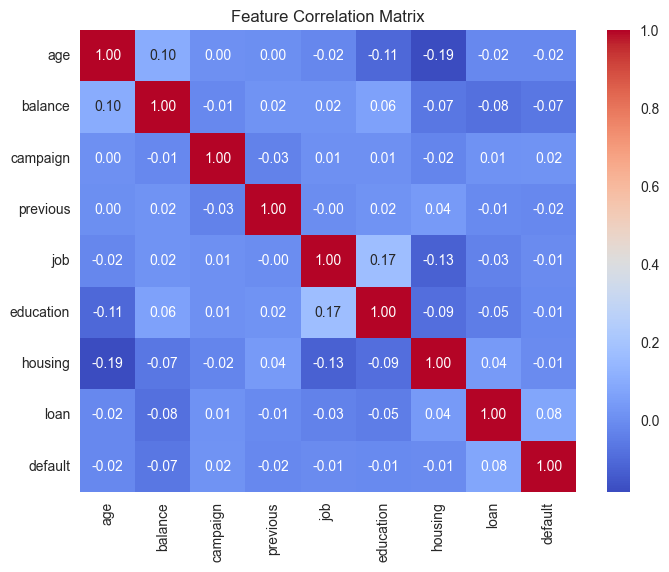

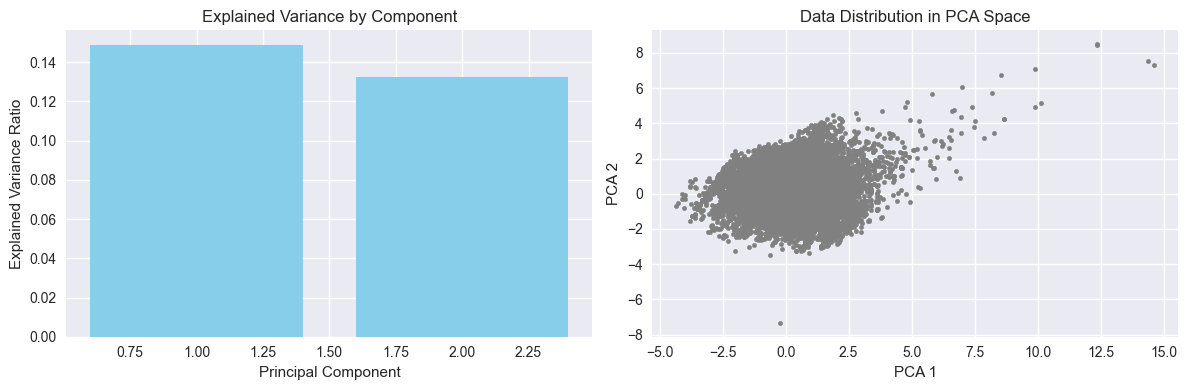

2
3
4
5
6
7
8
9
10


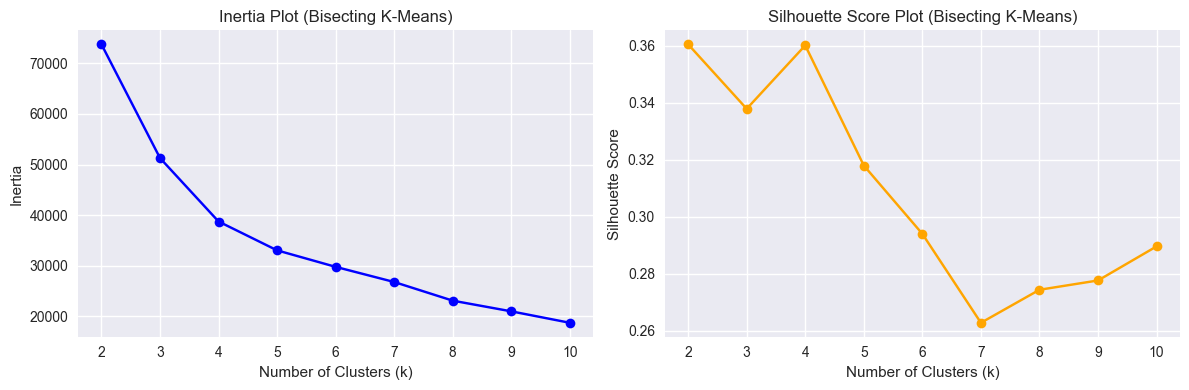

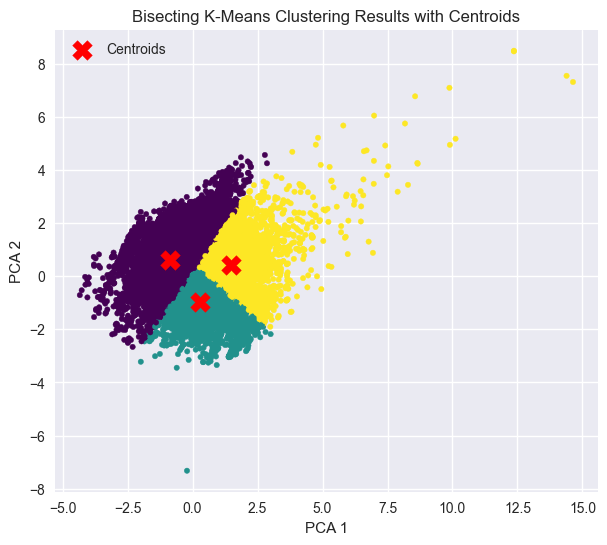

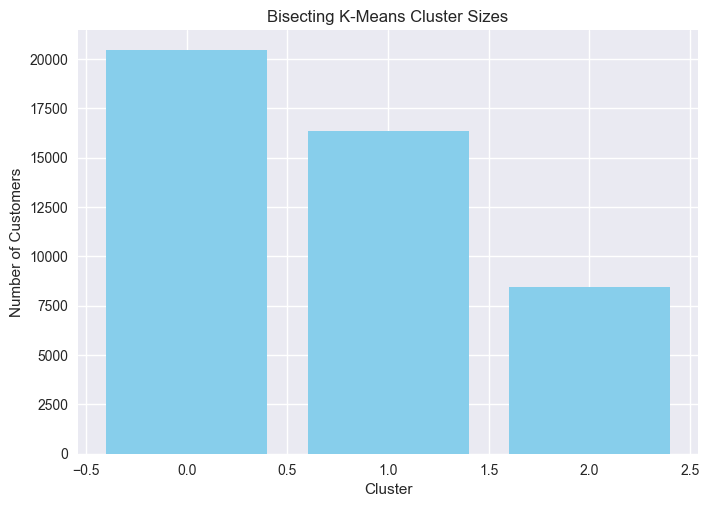

C:\Users\Chara\AppData\Local\Temp\ipykernel_25072\2938424376.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='silhouette', data=silhouette_df, palette='Set2')


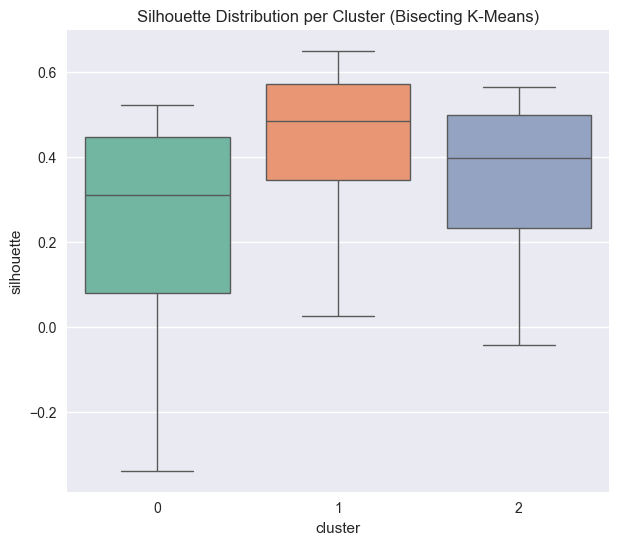

Final Silhouette Score (Bisecting K-Means): 0.3379


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

plt.figure(figsize=(8,6))
sns.heatmap(data[['age','balance','campaign','previous','job','education',
                  'housing','loan','default']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

pca = PCA(n_components=2)
X_pca_bisect = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), 
        pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

plt.subplot(1,2,2)
plt.scatter(X_pca_bisect[:,0], X_pca_bisect[:,1], s=10, c='gray')
plt.title('Data Distribution in PCA Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

def bisecting_metrics(X, max_k=10):
    inertias, silhouettes = [], []
    for k in range(2, max_k+1):
        print(f"{k}")
        bisect = BisectingKMeans(n_clusters=k, random_state=42)
        labels = bisect.fit_predict(X)
        inertias.append(np.sum(np.min(np.linalg.norm(
            X[:, np.newaxis] - np.array(list(bisect.centers_.values())),
            axis=2)**2, axis=1)))
        silhouettes.append(silhouette_score(X, labels))
    return inertias, silhouettes
inertias_bisect, silhouettes_bisect = bisecting_metrics(X_pca_bisect)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(2, len(inertias_bisect)+2), inertias_bisect, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Plot (Bisecting K-Means)')

plt.subplot(1,2,2)
plt.plot(range(2, len(silhouettes_bisect)+2), silhouettes_bisect, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot (Bisecting K-Means)')
plt.tight_layout()
plt.show()


bisect_final = BisectingKMeans(n_clusters=3, random_state=42)
labels_bisect = bisect_final.fit_predict(X_pca_bisect)

centroids = np.array(list(bisect_final.centers_.values()))

plt.figure(figsize=(7,6))
plt.scatter(X_pca_bisect[:,0], X_pca_bisect[:,1], c=labels_bisect, cmap='viridis', s=15)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title('Bisecting K-Means Clustering Results with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


unique, counts = np.unique(labels_bisect, return_counts=True)
plt.bar(unique, counts, color='skyblue')
plt.title('Bisecting K-Means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


sil_values = silhouette_samples(X_pca_bisect, labels_bisect)
silhouette_df = pd.DataFrame({'cluster': labels_bisect, 'silhouette': sil_values})

plt.figure(figsize=(7,6))
sns.boxplot(x='cluster', y='silhouette', data=silhouette_df, palette='Set2')
plt.title('Silhouette Distribution per Cluster (Bisecting K-Means)')
plt.show()


final_sil = silhouette_score(X_pca_bisect, labels_bisect)
print(f"Final Silhouette Score (Bisecting K-Means): {final_sil:.4f}")
